<a href="https://colab.research.google.com/github/Barrok/auto-mpg/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load required libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as Agnes

In [2]:
# load data
df = pd.read_fwf("auto-mpg.data", header = None)

# check how data frame looks like
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
# list contains column names
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# assign names to columns
df.columns = col_names
df['model_year'] = df['model_year'] + 1900
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,1982,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,1982,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,1982,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,1982,1,"""ford ranger"""


In [4]:
# check if there are any missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [5]:
# basic statistics of data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,1976.010050,3.697627,1970.0,1973.000,1976.0,1979.000,1982.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


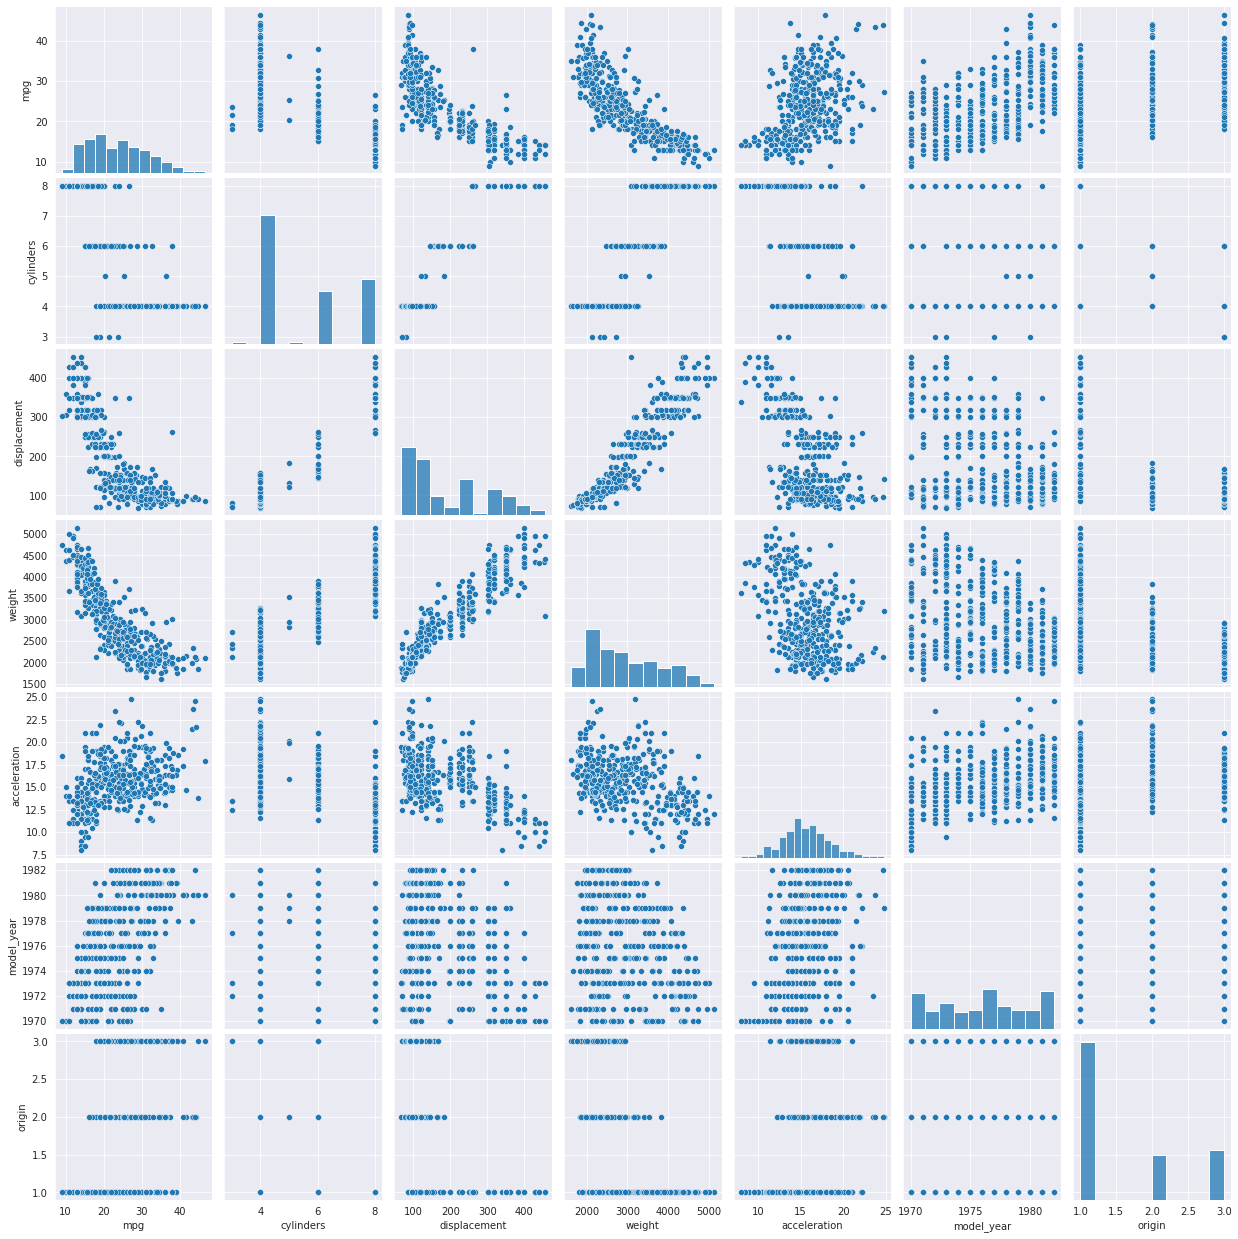

In [6]:
import seaborn as sns
sns.set_style("darkgrid")

sns.pairplot(df)

In [7]:
from scipy.stats import zscore
#dropping the Column name "car_name"
df1 = df.drop(['car_name'], axis = 1)
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1


In [8]:
# check what types are variables
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [9]:
# horsepower is a string, so I'll have to change it into float before standarization
df1['horsepower'] = df1['horsepower'].replace('?', "0")
df1['horsepower'] = df1['horsepower'].astype('float')
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [10]:
# standarization
dfst = df1.apply(zscore)
dfst.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145


# K-means

Text(0.5, 1.0, 'Selecting number od clusters with the Elbow Method')

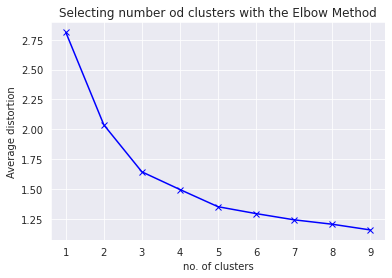

In [160]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfst)
    prediction=model.predict(dfst)
    meanDistortions.append(sum(np.min(cdist(dfst, model.cluster_centers_, 'euclidean'), axis=1)) / dfst.shape[0])

# visualization 
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('Average distortion')
plt.title('Selecting number od clusters with the Elbow Method')

In [161]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfst)
prediction=final_model.predict(dfst)

#Append the prediction 
df1["GROUP"] = prediction
dfst["GROUP"] = prediction
print("Groups Assigned : \n")
dfst.head()

Groups Assigned : 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP,labels
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145,0,0
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145,0,0
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145,0,0
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145,0,0
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145,0,0


In [162]:
dclust = dfst.groupby(['GROUP'])
dclust.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,labels
GROUP,,,,,,,,,
0,-0.900542,1.030043,1.007269,0.810628,0.955247,-0.430266,-0.427108,-0.693244,0.0
1,0.678382,-0.775935,-0.758780,-0.610650,-0.719591,0.324121,0.321742,0.522223,1.0


In [163]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfst)
prediction=final_model.predict(dfst)

#Append the prediction 
df1["GROUP"] = prediction
dfst["GROUP"] = prediction
print("Groups Assigned : \n")
dfst.head()

Groups Assigned : 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP,labels
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145,1,0
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145,1,0
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145,1,0
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145,1,0
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145,1,0


In [164]:
dclust1 = dfst.groupby(['GROUP'])
dclust1.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,labels
GROUP,,,,,,,,,
0,-0.540058,0.448590,0.368097,-0.013852,0.372293,0.349730,-0.028821,-0.670023,0.024096
1,-1.163797,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-0.715145,0.000000
2,0.697836,-0.805715,-0.777922,-0.624037,-0.737038,0.330635,0.303595,0.555817,1.018100


In [165]:
# Setting the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15)
kmeans.fit(dfst)

# centroids
centroids = kmeans.cluster_centers_
centroids

array([[-5.40057876e-01,  4.48589599e-01,  3.68096907e-01,
        -1.38522598e-02,  3.72292572e-01,  3.49730246e-01,
        -2.88211249e-02, -6.70023090e-01,  0.00000000e+00,
         2.40963855e-02],
       [-1.16379715e+00,  1.49819126e+00,  1.50392292e+00,
         1.47938187e+00,  1.40409797e+00, -1.08614860e+00,
        -6.88323847e-01, -7.15144780e-01,  1.00000000e+00,
         6.66133815e-16],
       [ 6.97835907e-01, -8.05714548e-01, -7.77922164e-01,
        -6.24036914e-01, -7.37038430e-01,  3.30635103e-01,
         3.03595452e-01,  5.55816859e-01,  2.00000000e+00,
         1.01809955e+00]])

In [166]:
# Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(dfst))
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP,labels
0,-0.540058,0.448590,0.368097,-0.013852,0.372293,0.349730,-0.028821,-0.670023,0.0,2.409639e-02
1,-1.163797,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-0.715145,1.0,6.661338e-16
2,0.697836,-0.805715,-0.777922,-0.624037,-0.737038,0.330635,0.303595,0.555817,2.0,1.018100e+00


In [167]:
centroid_df.mean()


mpg            -0.335340
cylinders       0.380355
displacement    0.364699
horsepower      0.280498
weight          0.346451
acceleration   -0.135261
model_year     -0.137850
origin         -0.276450
GROUP           1.000000
labels          0.347399
dtype: float64

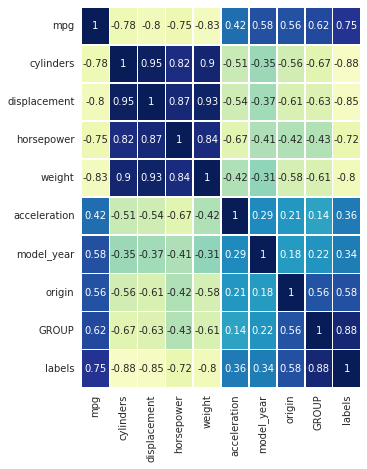

In [168]:
plt.figure(figsize=(5,7))
sns.heatmap(dfst.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

# Agglomerative Nesting (AGNES) 

In [169]:
# create a model
model = Agnes(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(dfst)
dfst['labels'] = model.labels_
dfst.head(10)
dfstClust = dfst.groupby(['labels'])
dfstClust.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
labels,,,,,,,,,
0,-0.871309,1.006005,0.971304,0.779165,0.920257,-0.412827,-0.379066,-0.693986,0.531073
1,0.711560,-0.810207,-0.784088,-0.588381,-0.745063,0.322462,0.305498,0.579245,2.000000
2,-0.046703,-0.562007,-0.443407,-2.558360,-0.301704,0.774051,0.200367,-0.715145,2.000000


In [173]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# pairwise distribution between data points is a measure of the correlation between 
# the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

# lets verify which method brings best result with this data

# empty data frame with column names
df = pd.DataFrame(columns = ['Metric', 'Method', "Score"])


# single element list of used metric
metrics = ["euclidean"]
# list of methods used
methods = ["single", "complete", "average", "ward", "weighted", "median", "centroid"]
# empty list, scores will be assgined in the future
score = []


# for euclidean metric
for x in metrics:

  # for each method in methods
  for y in methods:

    # perform clustering
    Z = linkage(dfst, metric=x, method=y)
    # compute the cophenetic correlation coefficient for the hierarchical cluster tree represented by Z
    c, coph_dists = cophenet(Z , pdist(dfst))
    # assign metric, method and score to dataframe df
    df = df.append({'Metric': x, 'Method': y, 'Score': c}, ignore_index=True)


# print out data frame df
df

,Metric,Method,Score
0,euclidean,single,0.776567
1,euclidean,complete,0.775278
2,euclidean,average,0.800059
3,euclidean,ward,0.780075
4,euclidean,weighted,0.750874
5,euclidean,median,0.668725
6,euclidean,centroid,0.797369


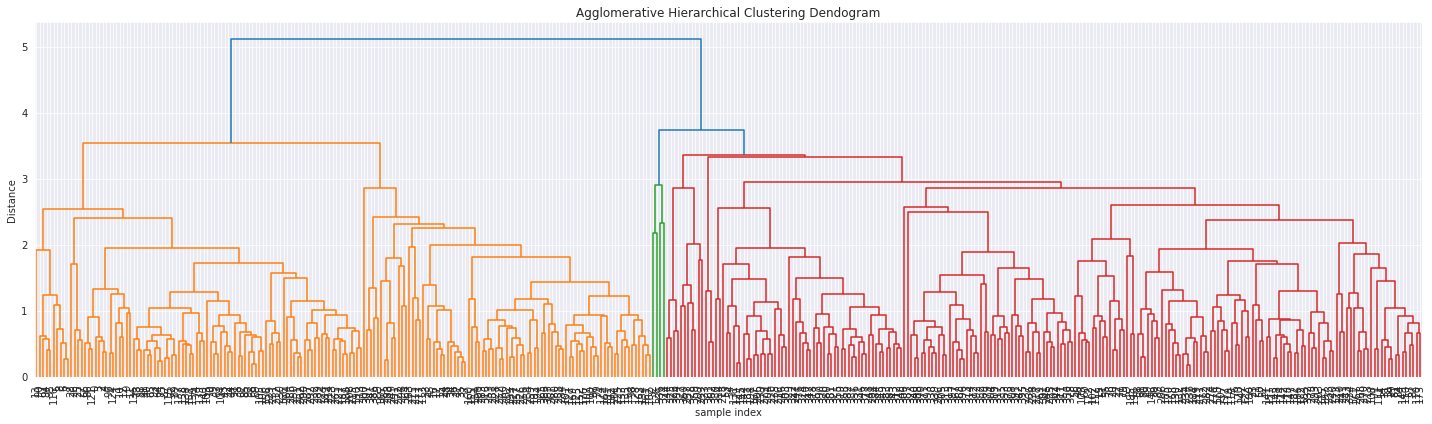

In [174]:
# this time method 'average' gives best result
# lets visualize this bad boy

# assign color to each group(cluster)
colors = dfst.iloc[:, -1].values

# viusualization
plt.figure(figsize=(20, 6))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage(dfst, metric='euclidean', method='average'), leaf_rotation=90.,  leaf_font_size=10.)
plt.tight_layout()

In [175]:
# get unique values and counts of each value
unique, counts = np.unique(colors, return_counts=True)

# display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0 177]
 [  1 217]
 [  2   4]]
